In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [10]:
# Extracting data from the source file into a panda Dataframe
file = "dummy_data_battery.csv"
# This file is fetched from the shared directory (on the JupyterHub server)

# We read the data and store it in a Dataframe called "data", using the read_csv function from the pandas package
data = pd.read_csv(file,header=0 , sep=',')

# This is just to replace all the void values in "data" by 0, which makes things easier
data.fillna(0, inplace=True)

# We store the time and inflows values in two lists
time = data['Time'].tolist()
stock_cars = data['Population'].tolist()


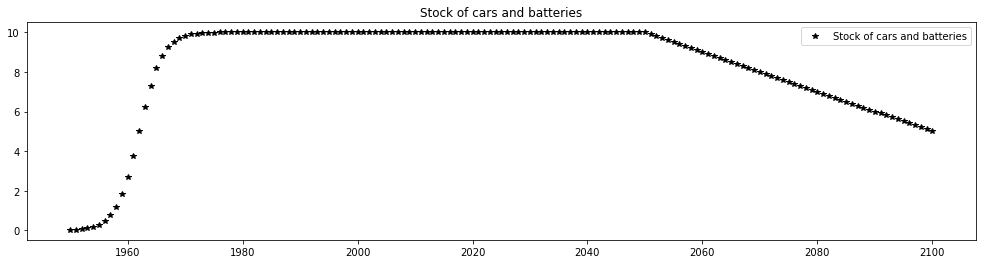

In [11]:
stock_change = [0] + np.diff(stock_cars).tolist()
outflows_cars = [0]
outflows_batteries = [0]
inflows_cars = [0]
inflows_AM_battery = [0]
stock_batteries = [0]


# Definition of lifetime vectors for cars and batteries
from scipy.stats import norm

lifetime_car = 16
st_dev_car = 4
lifetime_battery = 6
st_dev_battery = 0.5

years = len(time)

pdf_car = np.zeros(years)
for age in range(years):
    pdf_car[age] = norm(lifetime_car, st_dev_car).cdf(age) - norm(lifetime_car, st_dev_car).cdf(age - 1)
pdf_car = pdf_car/sum(pdf_car) # to ensure that the sum of the pdf function is 1 

   
pdf_battery = np.zeros(years)
for age in range(years):
    pdf_battery[age] = norm(lifetime_battery, st_dev_battery).cdf(age) - norm(lifetime_battery, st_dev_battery).cdf(age - 1)
pdf_battery = pdf_battery/sum(pdf_battery)  # to ensure that the sum of the pdf function is 1

#Stock-driven model
for i in range(1,len(stock_cars)):
    new_outflow = 0
    new_outflow_battery = 0
    for cohort in range(i):
        new_outflow += inflows_cars[cohort] * pdf_car[i-cohort]
        # the outflow of batteries from a cohort is the sum of OEM batteries (inflows_cars) and AM batteries
        new_outflow_battery += (inflows_cars[cohort] + inflows_AM_battery[cohort])  * pdf_battery[i-cohort]
    outflows_cars.append(new_outflow)    
    inflows_cars.append(stock_change[i] + outflows_cars[i])
    outflows_batteries.append(new_outflow_battery) 
    
    # the batteries that were in scrapped cars are not replaced  
    inflows_AM_battery.append(new_outflow_battery - new_outflow)
    stock_batteries.append(stock_batteries[-1] + inflows_cars[-1] - new_outflow)

    
# Alternaive calculation using replacement rate
# The effective replacement rate is defined as the ratio between the inflows of AM batteries and OEM batteries
real_replacement_rate = [AM / OEM for (AM, OEM) in zip(inflows_AM_battery[1:], inflows_cars[1:]) ]
# inflows_AM_rate shows what would be the inflows of batteries if calculated from a constant replacement rate
inflows_AM_rate = [np.mean(real_replacement_rate) * inflow for inflow in inflows_cars]


    
# Plot the stock - by definition, the stock of batteries is the same as the stock of cars
plt.figure(figsize=(17, 4))
plt.plot(time, stock_cars, 'k*', label='Stock of cars and batteries')
plt.title('Stock of cars and batteries')
plt.legend(loc='best')

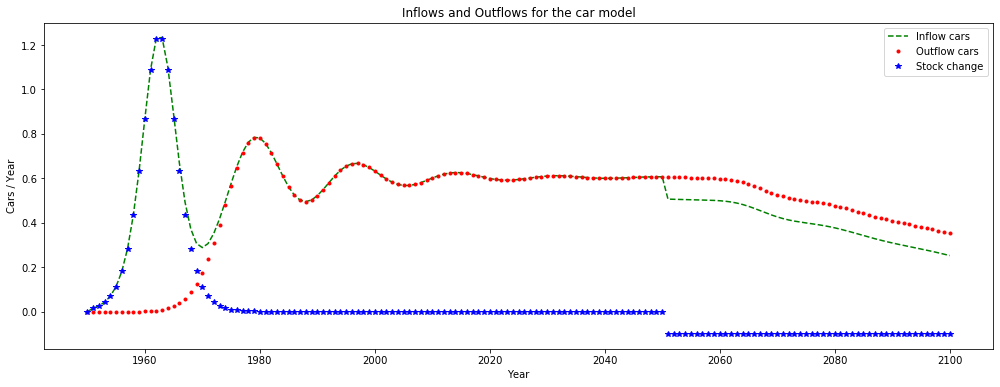

In [12]:
# Inflows and Outflows for the car model
plt.figure(figsize=(17, 6))
plt.plot(time, inflows_cars, 'g--', label='Inflow cars')
plt.plot(time, outflows_cars,'r.', label='Outflow cars')
plt.plot(time, stock_change, 'b*', label='Stock change')
# plt.plot(time, stock_cars, 'y*', label='Stock Cars')
plt.title('Inflows and Outflows for the car model')
plt.xlabel('Year')
plt.ylabel('Cars / Year')
plt.legend(loc='best')

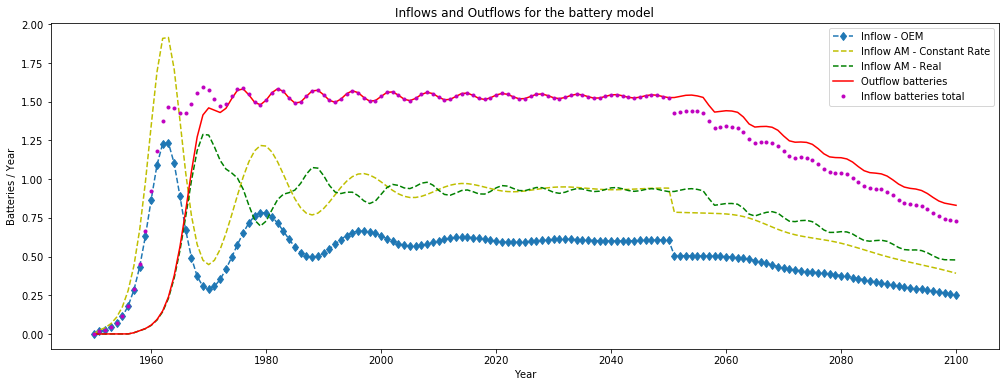

In [13]:
# Inflows and Outflows for the battery model
plt.figure(figsize=(17, 6))
plt.plot(time, inflows_cars, 'd--', label='Inflow - OEM')
# inflows_AM_rate Shows what would be the inflows of batteries if calculated from a constant replacement rate
plt.plot(time, inflows_AM_rate, 'y--', label='Inflow AM - Constant Rate')
plt.plot(time, inflows_AM_battery, 'g--', label='Inflow AM - Real')
plt.plot(time, outflows_batteries,'r-', label='Outflow batteries')
plt.plot(time, [AM + OEM for (AM, OEM) in zip(inflows_AM_battery, inflows_cars)], 'm.', label='Inflow batteries total')


plt.title('Inflows and Outflows for the battery model')
plt.xlabel('Year')
plt.ylabel('Batteries / Year')
plt.legend(loc='best')

mean replacement rate: 1.5519605429484804


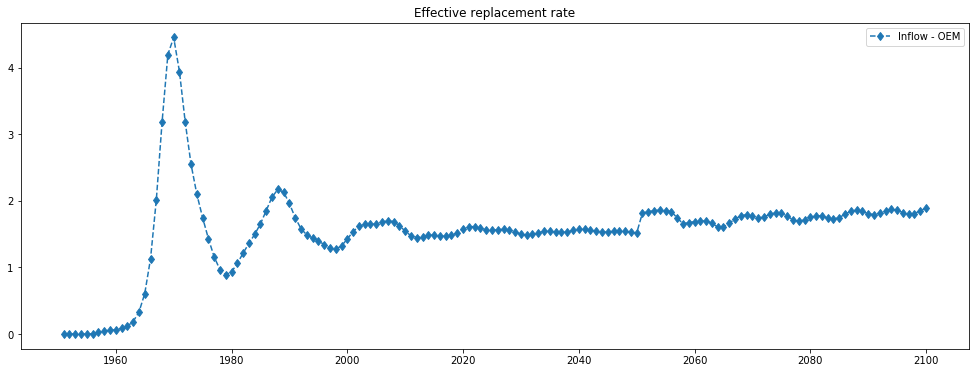

In [14]:
# Plot the effective replacement rate
plt.figure(figsize=(17, 6))
plt.plot(time[1:], real_replacement_rate, 'd--', label='Inflow - OEM')
plt.title('Effective replacement rate')
plt.legend(loc='best')
print("mean replacement rate:", np.mean(real_replacement_rate))



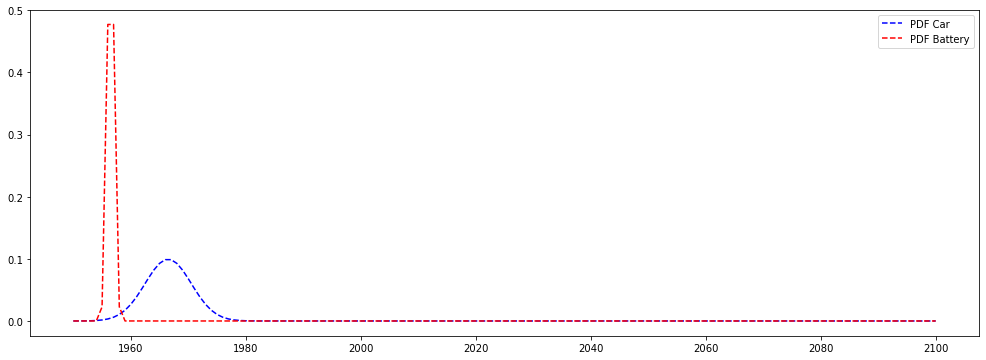

In [15]:
# Lifetime of cars and batteries
plt.figure(figsize=(17, 6))
plt.plot(time, pdf_car, 'b--', label='PDF Car')
plt.plot(time, pdf_battery, 'r--', label='PDF Battery')
plt.legend(loc='best')

In [16]:
print(pdf_battery)

[1.77648211e-33 7.61985302e-24 6.22096050e-16 9.86587023e-10
 3.16702552e-05 2.27184607e-02 4.77249868e-01 4.77249868e-01
 2.27184607e-02 3.16702552e-05 9.86587034e-10 6.66133815e-16
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.000000